In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('churn_prediction.csv')



In [3]:
data.head()

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,101348.88,1
1,1,-0.440036,0,0,0.198164,1,0.117350,1,0,1,112542.58,0
2,2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,113931.57,1
3,3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,93826.63,0
4,4,2.063884,0,0,0.388871,2,0.785728,1,1,1,79084.10,0


In [4]:
del data['Unnamed: 0']

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,101348.88,1
1,-0.440036,0,0,0.198164,1,0.117350,1,0,1,112542.58,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,113931.57,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,93826.63,0
4,2.063884,0,0,0.388871,2,0.785728,1,1,1,79084.10,0


In [ ]:
X = data[0:10,:]

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


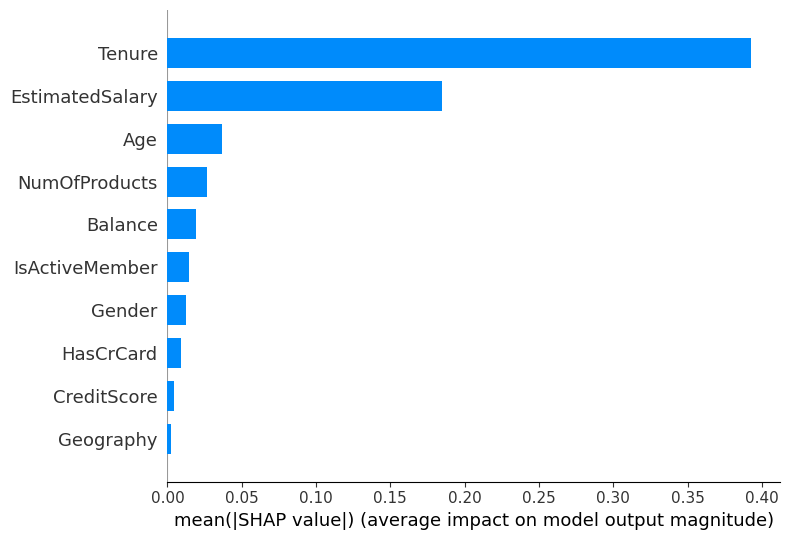

In [9]:
# Define input features and target variable
X = data.iloc[:,0:10]
y = data['Exited']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model to predict churn
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Calculate SHAP values to interpret the model
explainer = shap.LinearExplainer(lr, X_train, feature_dependence='independent')
shap_values = explainer.shap_values(X_test)

# Interpret model with SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')